# Problem statement - 1
Random Forest
 
Assignment


About the data: 
    
Let’s consider a Company dataset with around 10 variables and 400 records. 

The attributes are as follows: 
    
 Sales -- Unit sales (in thousands) at each location

 Competitor Price -- Price charged by competitor at each location

 Income -- Community income level (in thousands of dollars)

 Advertising -- Local advertising budget for company at each location (in thousands of dollars)

 Population -- Population size in region (in thousands)

 Price -- Price company charges for car seats at each site

 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

 Age -- Average age of the local population

 Education -- Education level at each location

 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location

 US -- A factor with levels No and Yes to indicate whether the store is in the US or not

The company dataset looks like this: 
 
Problem Statement:
    
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 

Approach - A random forest can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
#Loading datasets
data1=pd.read_csv('Company_Data.csv')

In [3]:
data1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
data1.Sales.value_counts()

7.80    4
8.77    3
9.32    3
4.10    3
6.20    3
       ..
3.67    1
7.62    1
9.54    1
8.41    1
9.71    1
Name: Sales, Length: 336, dtype: int64

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
data1.duplicated().sum()

0

# Converting sales data into 3 categories Low, High, Medium by binning sales columns

In [7]:
bins = np.linspace(min(data1['Sales']), max(data1['Sales']), 4)
bins

array([ 0.        ,  5.42333333, 10.84666667, 16.27      ])

In [8]:
label_names = ['Low', 'Medium', 'High']

In [9]:
data1['Sales_bin'] = pd.cut(data1['Sales'], bins, labels=label_names, include_lowest=True )
data1[['Sales','Sales_bin']].head(10)

,Sales,Sales_bin
0,9.50,Medium
1,11.22,High
2,10.06,Medium
3,7.40,Medium
4,4.15,Low
5,10.81,Medium
6,6.63,Medium
7,11.85,High
8,6.54,Medium
9,4.69,Low


In [10]:
data1 = data1.drop(("Sales"),axis=1)

In [11]:
data1.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_bin
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,Medium
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,141,64,3,340,128,Bad,38,13,Yes,No,Low


# Doing label encoding for categorical columns

In [12]:
label_encoder = preprocessing.LabelEncoder()

In [13]:
data1['ShelveLoc']= label_encoder.fit_transform(data1['ShelveLoc']) 
data1['Urban']= label_encoder.fit_transform(data1['Urban'])
data1['US']= label_encoder.fit_transform(data1['US']) 

In [14]:
data1['Sales_bin']=label_encoder.fit_transform(data1['Sales_bin'])

In [15]:
data1.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_bin
0,138,73,11,276,120,0,42,17,1,1,2
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,2
3,117,100,4,466,97,2,55,14,1,1,2
4,141,64,3,340,128,0,38,13,1,0,1


In [16]:
data1.ShelveLoc.value_counts()

2    219
0     96
1     85
Name: ShelveLoc, dtype: int64

In [17]:
data1.Urban.value_counts()

1    282
0    118
Name: Urban, dtype: int64

In [18]:
data1.US.value_counts()

1    258
0    142
Name: US, dtype: int64

In [19]:
data1.Sales_bin.value_counts()

2    247
1    102
0     51
Name: Sales_bin, dtype: int64

In [20]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   CompPrice    400 non-null    int64
 1   Income       400 non-null    int64
 2   Advertising  400 non-null    int64
 3   Population   400 non-null    int64
 4   Price        400 non-null    int64
 5   ShelveLoc    400 non-null    int32
 6   Age          400 non-null    int64
 7   Education    400 non-null    int64
 8   Urban        400 non-null    int32
 9   US           400 non-null    int32
 10  Sales_bin    400 non-null    int32
dtypes: int32(4), int64(7)
memory usage: 28.2 KB


# Splitting data in x and y variable

In [21]:
x=data1.iloc[:,0:-1]
y=data1.iloc[:,-1]

In [22]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [23]:
y

0      2
1      0
2      2
3      2
4      1
      ..
395    0
396    2
397    2
398    2
399    2
Name: Sales_bin, Length: 400, dtype: int32

# Splitting data in train test data

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [25]:
print(x_train,' ',y_train)

     CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
303        133      52           16         290     99          2   43   
349        134      27           18         467     96          2   49   
149        121     120           13         140     87          2   56   
100        113      69           11          94    106          2   76   
175        115      89            0          38    122          2   25   
..         ...     ...          ...         ...    ...        ...  ...   
369        135     100           22         463    122          2   36   
320        136      70           12         171    152          2   44   
15         149      95            5         400    144          2   76   
125         89      78            0         181     49          2   43   
265        130      35           10         402    129          0   39   

     Education  Urban  US  
303         11      1   1  
349         14      0   1  
149         11      1   1  

### Building Random Forest Classification Model

In [29]:
num_trees = 100
max_features = 6
model1 = RandomForestClassifier(n_estimators=num_trees,max_features=max_features)

In [31]:
# Evaluate the base model(without hypertuning)

from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=10,shuffle=True)
result = cross_val_score(model1, x_train, y_train,cv=cv)

print("Accuracy is:",np.mean(result))

Accuracy is: 0.70625


In [32]:
# Iterating over a range of folds in StratifiedKFold
mean_accuracy=[]
n_folds=[]

for i in range(2,15):
    cv2=StratifiedKFold(n_splits=i,shuffle=True,random_state=20)
    result = cross_val_score(model1, x_train, y_train, cv=cv2)
    avg=np.mean(result)
    mean_accuracy.append(avg)
    n_folds.append(i)

<AxesSubplot:>

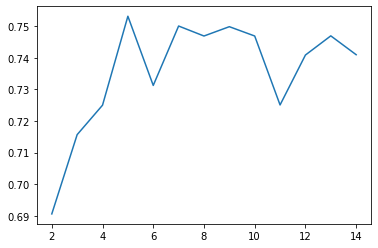

In [33]:
## Visualizing the scores generated for each number of folds

import seaborn as sns
sns.lineplot(x=n_folds,y=mean_accuracy)

## Fitting the model and finding the important features

In [35]:
model1.fit(x_train,y_train)
model1.feature_importances_

array([0.12026994, 0.10195896, 0.07934118, 0.09630262, 0.22717897,
       0.16359836, 0.13712562, 0.04799073, 0.01268146, 0.01355215])

In [37]:
cols=['CompPrice', 'Income', 'Advertising', 'Population', 'Price','ShelveLoc', 'Age', 'Education', 'Urban', 'US']
feature_imp=pd.Series(model1.feature_importances_,index=cols).sort_values(ascending=False)
feature_imp

Price          0.227179
ShelveLoc      0.163598
Age            0.137126
CompPrice      0.120270
Income         0.101959
Population     0.096303
Advertising    0.079341
Education      0.047991
US             0.013552
Urban          0.012681
dtype: float64

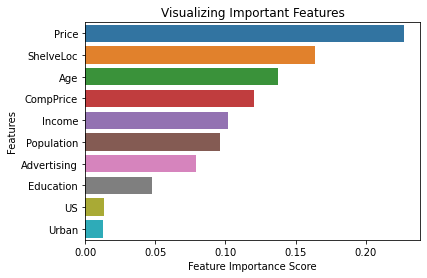

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

The four most important features/attributes for predicting sales of this company are:Price,ShelveLoc,Age and CompPrice

In [39]:
#Predicting on test data
preds = model1.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

2    62
1    15
0     3
dtype: int64

In [40]:
from sklearn import metrics
metrics.accuracy_score(preds,y_test)

0.6875

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.67      0.17      0.27        12
           1       0.60      0.53      0.56        17
           2       0.71      0.86      0.78        51

    accuracy                           0.69        80
   macro avg       0.66      0.52      0.54        80
weighted avg       0.68      0.69      0.66        80



In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,preds)

array([[ 2,  0, 10],
       [ 0,  9,  8],
       [ 1,  6, 44]], dtype=int64)

# By using Grid search cv to find best hyperparameter for model

In [43]:
model2=RandomForestClassifier()

In [44]:
from sklearn.model_selection import GridSearchCV

In [50]:
param_grid={'n_estimators': [130,140,150,160],
            'max_features': [4,5,6,7]}

In [51]:
grid_dt=GridSearchCV(model2,param_grid,scoring='accuracy',refit = True,cv=cv)

In [52]:
grid_dt.fit(x_train, y_train) 


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_features': [4, 5, 6, 7],
                         'n_estimators': [130, 140, 150, 160]},
             scoring='accuracy')

In [53]:
print(grid_dt.best_params_)

{'max_features': 6, 'n_estimators': 140}


In [54]:
grid_pred = grid_dt.predict(x_test) 

In [55]:
metrics.accuracy_score(grid_pred,y_test)

0.7

In [56]:
print(classification_report(y_test, grid_pred)) 

              precision    recall  f1-score   support

           0       1.00      0.25      0.40        12
           1       0.57      0.47      0.52        17
           2       0.71      0.88      0.79        51

    accuracy                           0.70        80
   macro avg       0.76      0.53      0.57        80
weighted avg       0.73      0.70      0.67        80



In [57]:
print(confusion_matrix(y_test,grid_pred))

[[ 3  0  9]
 [ 0  8  9]
 [ 0  6 45]]


# Problem Statement - 2

Use Random Forest to prepare a model on fraud data 

treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not

Marital.Status : marital status of a person

Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 

Work Experience : Work experience of an individual person

Urban : Whether that person belongs to urban area or not

In [58]:
#loading Dataset
data2 = pd.read_csv("Fraud_check.csv")

In [59]:
data2.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [60]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [61]:
data2.duplicated().sum()

0

In [62]:
data2['Taxable.Income'].describe()

count      600.000000
mean     55208.375000
std      26204.827597
min      10003.000000
25%      32871.500000
50%      55074.500000
75%      78611.750000
max      99619.000000
Name: Taxable.Income, dtype: float64

In [63]:
#Creating a new column called Fraud_Check 
group_names = ['Risky', 'Not Risky']
data2['Fraud_Check']=pd.cut(data2['Taxable.Income'], bins = [0,30000,1000000], labels = group_names)


In [64]:
data2.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Fraud_Check
0,NO,Single,68833,50047,10,YES,Not Risky
1,YES,Divorced,33700,134075,18,YES,Not Risky
2,NO,Married,36925,160205,30,YES,Not Risky
3,YES,Single,50190,193264,15,YES,Not Risky
4,NO,Married,81002,27533,28,NO,Not Risky


In [65]:
data2['Fraud_Check'].value_counts()

Not Risky    476
Risky        124
Name: Fraud_Check, dtype: int64

In [66]:
data2['Undergrad']= label_encoder.fit_transform(data2['Undergrad']) 
data2['Marital.Status']= label_encoder.fit_transform(data2['Marital.Status'])
data2['Urban']= label_encoder.fit_transform(data2['Urban']) 
data2['Fraud_Check']=label_encoder.fit_transform(data2['Fraud_Check'])

In [67]:
data2.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Fraud_Check
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0


In [68]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int32
 1   Marital.Status   600 non-null    int32
 2   Taxable.Income   600 non-null    int64
 3   City.Population  600 non-null    int64
 4   Work.Experience  600 non-null    int64
 5   Urban            600 non-null    int32
 6   Fraud_Check      600 non-null    int32
dtypes: int32(4), int64(3)
memory usage: 23.6 KB


In [69]:
data2['Undergrad'].value_counts()

1    312
0    288
Name: Undergrad, dtype: int64

In [70]:
data2['Marital.Status'].value_counts()

2    217
1    194
0    189
Name: Marital.Status, dtype: int64

In [71]:
data2['Urban'].value_counts()

1    302
0    298
Name: Urban, dtype: int64

In [72]:
data2['Fraud_Check'].value_counts()

0    476
1    124
Name: Fraud_Check, dtype: int64

# Splitting data in x and y variable

In [73]:
x=data2.iloc[:,0:-1]
y=data2.iloc[:,-1]

In [74]:
x

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [75]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Fraud_Check, Length: 600, dtype: int32

# Splitting data in train test data

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [77]:
print(x_train,' ',y_train)

     Undergrad  Marital.Status  Taxable.Income  City.Population  \
284          0               0           15673           188383   
423          0               1           94528            80249   
525          1               2           47565            75307   
519          1               2           60915           162102   
12           0               0           11794           148033   
..         ...             ...             ...              ...   
369          0               1           94413            89122   
320          1               2           78922            78897   
527          0               1           59243           180274   
125          1               0           87326           155669   
265          0               1           14326           101996   

     Work.Experience  Urban  
284               22      1  
423               19      1  
525               23      0  
519               25      1  
12                14      1  
..             

# By using Grid search cv finding best Hyper parameters Random Forest Model

In [79]:
mod=RandomForestClassifier()

In [80]:
grid_dt=GridSearchCV(mod,param_grid,scoring='accuracy',refit = True,cv=cv)

In [81]:
grid_dt.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_features': [4, 5, 6, 7],
                         'n_estimators': [130, 140, 150, 160]},
             scoring='accuracy')

In [82]:
print(grid_dt.best_params_)

{'max_features': 4, 'n_estimators': 130}


# Building Random Forest model by using best parameters

In [90]:
mod2=RandomForestClassifier(n_estimators=130,max_features=4)

In [91]:
mod2.fit(x_train,y_train)

RandomForestClassifier(max_features=4, n_estimators=130)

In [92]:
pred=mod2.predict(x_test)

In [93]:
metrics.accuracy_score(pred,y_test)

1.0

In [94]:
print(classification_report(y_test,pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00        26

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [95]:
print(confusion_matrix(y_test,pred))

[[94  0]
 [ 0 26]]
